<a href="https://colab.research.google.com/github/PedroHenrique0214/machine_learning_stroke/blob/main/Projeto_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O projeto em questão aborda um conjunto de dados que se concentra em pacientes, com o objetivo de prever a ocorrência de AVC (Acidente Vascular Cerebral). O conjunto de dados consiste em 10 colunas que contêm informações sobre a saúde e o estilo de vida dos pacientes. A tarefa principal é utilizar modelos de aprendizado supervisionado para prever, matematicamente, a probabilidade de um paciente sofrer um AVC.

O foco principal deste projeto é maximizar o resultado do recall do nosso modelo. Isso é crucial para minimizar o número de falsos negativos, uma vez que uma predição errônea, nesse contexto, pode ter implicações significativas para a saúde do paciente.

Além disso, uma análise mais aprofundada dos dados pode fornecer insights sobre as principais causas de AVC, conforme identificadas em nosso conjunto de dados. Essas informações são valiosas para os profissionais de saúde, pois podem orientar estratégias de tratamento e prevenção mais eficazes para os pacientes.

In [40]:
# Configuração de warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Importando as principais bibliotecas para tratamento e visualização dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # Para a Seleção Univariada
from sklearn.feature_selection import f_classif # Para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # Para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.preprocessing import StandardScaler # Para realizar a padronização dos dados
from sklearn.preprocessing import MinMaxScaler # Para realizar a normalização dos dados
from sklearn.model_selection import train_test_split # Para separar nosso modelo em treino e teste
from sklearn.model_selection import KFold # Para selecionar o número de folds
from sklearn.model_selection import cross_val_score # Para realizar a validação cruzada dos dados
from sklearn.model_selection import GridSearchCV # Para fazer a hiperparametrização dos dados
from sklearn.metrics import accuracy_score # Para checar a acurácia dos dados
from sklearn.pipeline import Pipeline, make_pipeline # Para fazer o pipeline na construção do modelo

%matplotlib inline

In [42]:
# Importando o dataset
path = "https://github.com/PedroHenrique0214/machine_learning_stroke/raw/main/stroke_data.csv"
avc = pd.read_csv(path)

avc.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


# A seguintes informações podem ser retiradas do dataset:
sex: Gênero do paciente (1: homem; 0: mulher)

age: Idade do paciente (em anos)

hypertension: Paciente tem hipertensão (1), ou não tem(0)

heart_disease: Paciente já teve problemas no coração(1), ou não (0)

ever_married: Paciente casado (1) ou não (0)

work_type: Tipo de trabalho: 0 - Nunca Trabalhou, 1 - Criança, 2 - Emprego governamental, 3 - Conta própria, 4 - Privado

Residence_type: Área do paciente: 1 - Urbano, 0 - Rural

avg_glucose_level: Nível médio de açucar no sangue

bmi: Índece de massa corporal

smoking_status: 1 - fumante, 0 - nunca fumou

stroke: Paciente teve um avc (1), ou não (0)

In [43]:
# Olhando as informações dos dados
avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


- Faltando 3 dados sobre o sexo do paciente.

In [44]:
avc.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


# Algumas coisas que já conseguimos observar
- Existem idades negativas que devem ser corrigidas
- Existe um certo equilibrio de dados nas colunas: sex, Residence_type, smoking_status, stroke, pois a média se aproxima de 0,5
- Existe um desequilibrio de dados em: hypertension, hrat_disease, ever_married.

In [45]:
# Verificando a existência de dados duplicados
duplicados = avc.drop_duplicates()

duplicatas_removidas = avc.shape[0] - duplicados.shape[0]
print(f'{duplicatas_removidas} linhas duplicadas removidas.')

0 linhas duplicadas removidas.


In [46]:
# Verificando o equilibrio do nosso target 'stroke'
avc.stroke.value_counts()

stroke
1    20460
0    20450
Name: count, dtype: int64

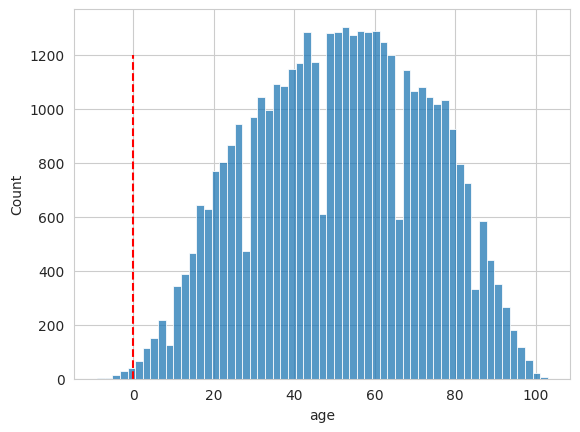

In [47]:
# Verificando a idade dos pacientes
fig, ax = plt.subplots()

sns.histplot(x='age', data=avc, palette='viridis')

ax.plot([0,0], [0, 1200], '--r')

In [48]:
# Podemos verificar se são crianças pela coluna 'work_type'
idade_neg = len(avc[avc['age']<0])
print(f'Quantidade de pacientes com idade abaixo de zero: {idade_neg}')

crianca = len(avc[(avc['age'] < 0) & (avc['work_type'] == 1)])
print(f'Quantidade de pacientes com idade negativa que são crianças: {crianca}')

Quantidade de pacientes com idade abaixo de zero: 58
Quantidade de pacientes com idade negativa que são crianças: 0


Verificado que nenhuma das idades negativas se trata de crianças de acordo com os dados de trabalho. Decidi substituir essas idade negativas pela mediana de idades de homens e mulheres para não atrapalhar as métricas do dataset e futuramente do nosso modelo.

In [49]:
# Substituindo as idades negativas para a madiana de idade masculina e feminina
# Calculando a média das idades para cada sexo
median_idade_homem = avc[avc['sex'] == 1]['age'].median()
median_idade_mulher = avc[avc['sex'] == 0]['age'].median()

# Substituindo idades negativas pela média do sexo correspondente
avc.loc[avc['age'] < 0, 'age'] = avc.loc[avc['age'] < 0].apply(lambda row: median_idade_homem if row['sex'] == 1 else median_idade_mulher, axis=1)

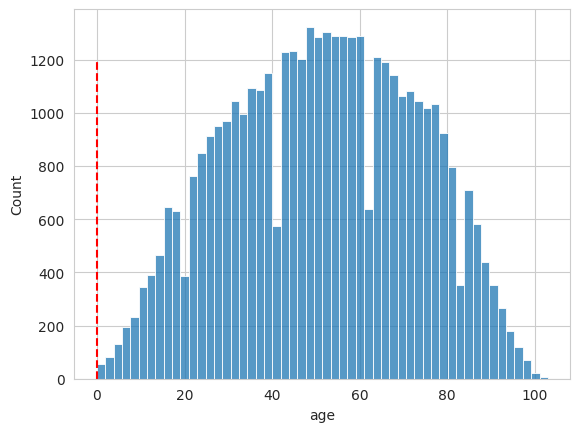

In [50]:
# Verificando a idade dos pacientes
fig, ax = plt.subplots()

sns.histplot(x='age', data=avc, palette='viridis')

ax.plot([0,0], [0, 1200], '--r')

In [51]:
# Verificando falta de dados
avc.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [52]:
# Verificando os 3 gêneros faltantes no dataset
avc[avc['sex'].isnull()]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22478,NaN,39.0,0,0,1,4,1,70.56,28.6,1,0
28908,NaN,36.0,0,0,1,4,1,70.56,28.6,1,0
35184,NaN,77.0,0,0,1,4,1,70.56,28.6,1,0


Como não tem nenhuma informação relevante e temos uma grande quantidade de dados, vou excluir esses 3 pacientes do dataset.

In [53]:
# Excluindo as informações nulas
avc = avc.drop(avc[avc['sex'].isnull()].index)

avc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


### Analise Exploratória dos Dados

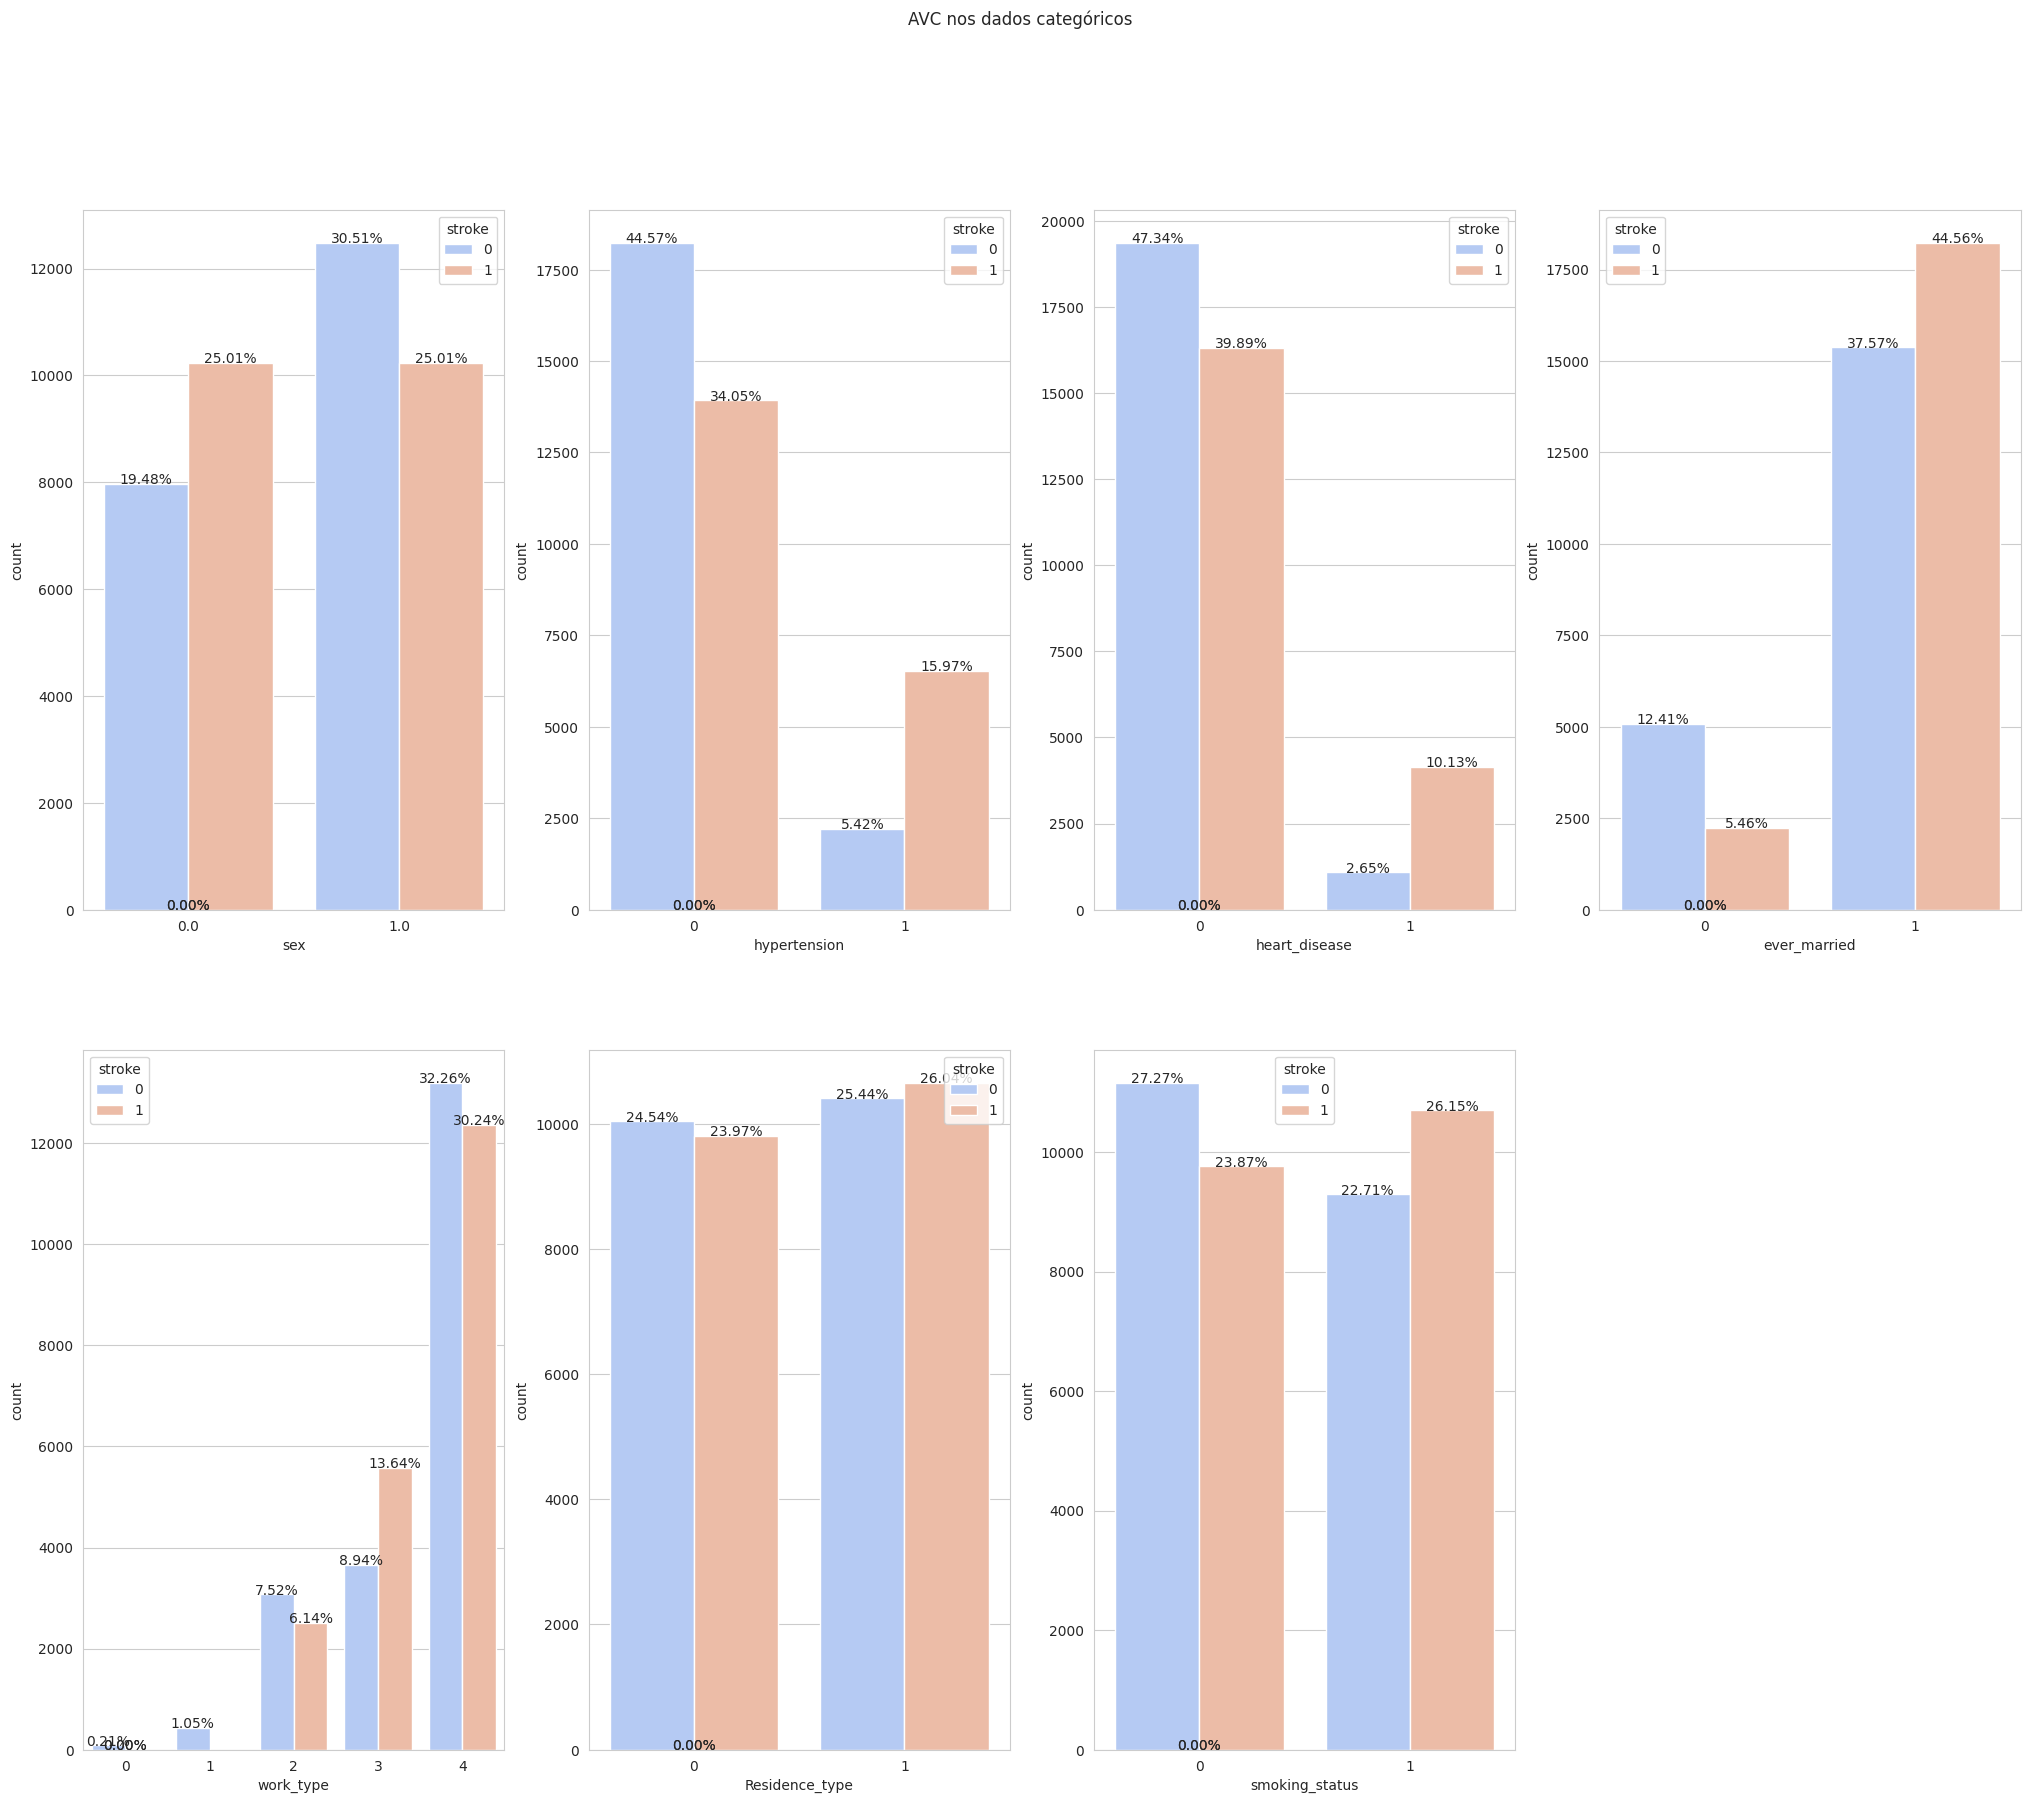

In [54]:
# Verificando os valores binários e sua relação com o avc
sns.set_style("whitegrid")
avc_cat = avc[['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
plt.figure(figsize=(25, 20))
plt.suptitle('AVC nos dados categóricos')

# Subplots
for i, feature in enumerate(avc_cat):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(x=feature, hue='stroke', data=avc, palette='coolwarm')
    total = len(avc_cat)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")

Algumas variáveis tem uma maior influência na ocorrência de AVC's:
- A existência de alguma doença cardiaca;
- Hipertensão também pode aumentar a sinalização de AVC;
- Ser um trabalhador autonamo também parece ter um certa influência;
- Tipo de residência, casamento e sexo não tem uma indicação tão forte como as outras variáveis observando apenas pelo gráfico;

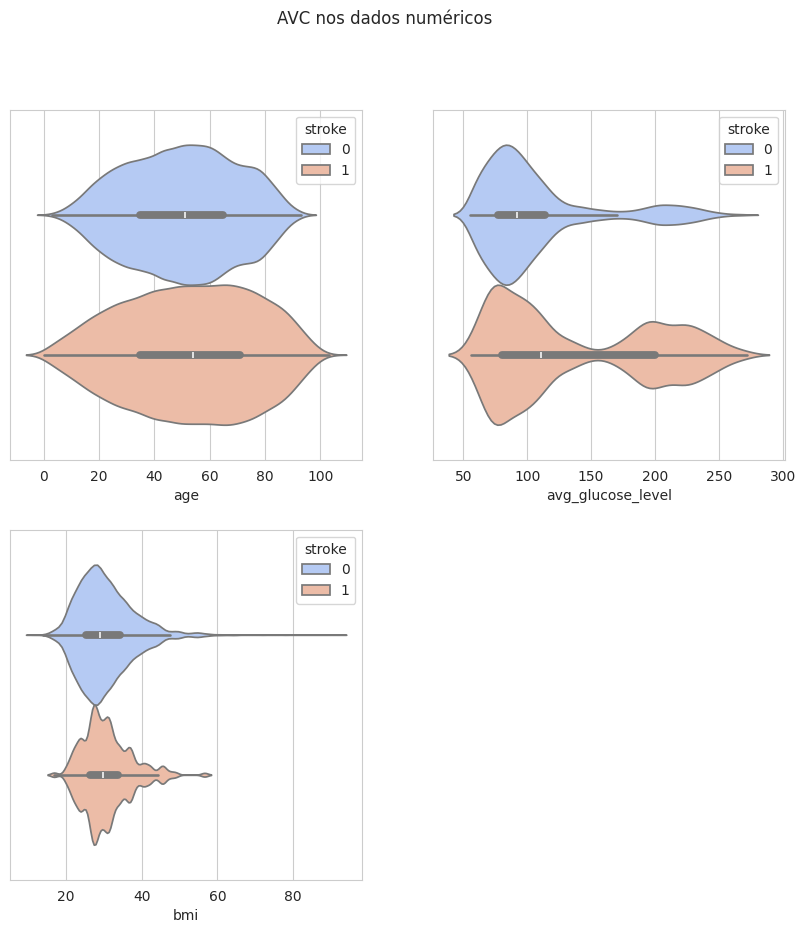

In [55]:
# Vamos visualizar os dados números para tirar algumas informações deles
avc_num = avc[['age', 'avg_glucose_level', 'bmi']]
plt.figure(figsize=(10, 10))
plt.suptitle('AVC nos dados numéricos')


for i, feature in enumerate(avc_num):
    plt.subplot(2, 2, i+1)
    ax = sns.violinplot(x=feature, hue='stroke', data=avc, palette='coolwarm')

Podemos notar que em níveis elevados de glicose, a ocorrência de AVC aumenta consideravelmente.

<Figure size 1200x800 with 0 Axes>

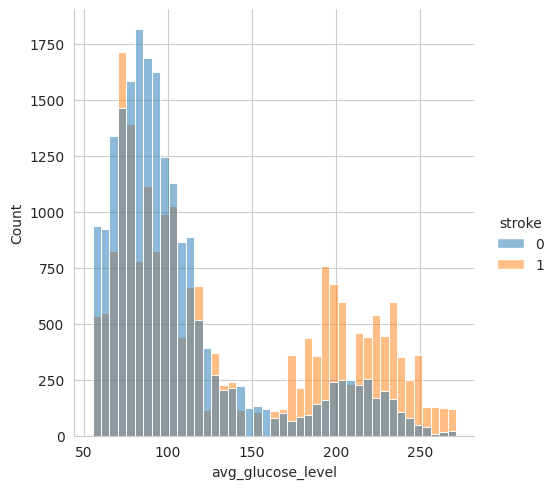

In [56]:
# Verificando o impacto nos casos de avc pela variável 'avg_glucose_level'
plt.figure(figsize=(12, 8))
sns.displot(x='avg_glucose_level', data=avc, hue='stroke')

### Dividindo nosso dataset em treino e teste

In [57]:
# Vamos dividir nossos dados entre atributos e classe
array = avc.values
feature = array[:,0:10] # Atributos
target = array[:,10] # Classe

# Vamos difivir fazer também a divisão de treino e teste
# Separando em teste e treino
X_train, X_test, y_train, y_test = train_test_split(feature, target,test_size=0.2, shuffle=True) # holdout com estratificação

# Validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True) # validação cruzada com estratificação

Nessas etapas eu deixei como comentário alguns modelos que acabavam por demorar demais a execução do código. Porém nenhum desses modelos apresentavam um resultado tão satisfatório.

In [58]:
# Vamos fazer primeiro nossos modelos sem realizar a padronização e normalização dos dados

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC())) Estava demorando muito para excutar o código, e não apresentava um resultado satisfatório.

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
# models.append(('Voting', VotingClassifier(bases))) Estava demorando muito para excutar o código, e não apresentava um resultado satisfatório.

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.682139 (0.007224)
KNN: 0.806295 (0.008100)
CART: 0.999725 (0.000373)
NB: 0.670772 (0.004268)
Bagging: 0.999878 (0.000367)
RF: 0.997586 (0.000971)
ET: 0.996119 (0.001297)
Ada: 0.739374 (0.007443)
GB: 0.802628 (0.007528)


Podemos notar que modelos que tem como base de funcionamento as árvores de decisão tem um excelente resultado em relação aos outros. Mas devemos ter cuidado, pois um resultado tão alto pode ser devido a ocorrência de overfitting no modelo.

Para tal, vamos verificar se existe essa possibilidade a seguir:

Os melhores parâmetros encontrados para a árvore de decisão são os seguintes:
{'max_depth': 25, 'max_features': 9}


Acurácia no treinamento 0.999877769289534
Acurácia no teste 0.997433390369103


AUC-ROC Score: 0.9975547247643897


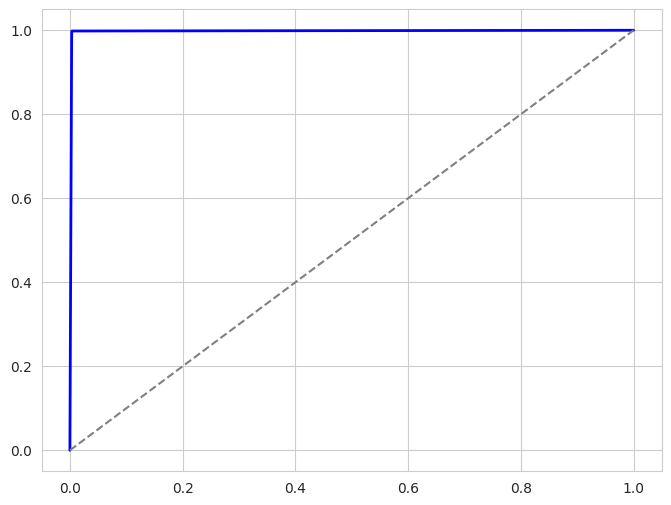

In [59]:
# Checando a ocorrência de overfiting no modelo
CART = DecisionTreeClassifier()
CART = CART.fit(X_train, y_train)

# Definindo os parâmetros
param_grid = {'max_depth':range(1, CART.tree_.max_depth+1, 2),
              'max_features': range(1, len(CART.feature_importances_)+1)}
gridCART = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)

# fitting the model for grid search
gridCART.fit(X_train, y_train)

# Pegando os melhores parâmetros
print('Os melhores parâmetros encontrados para a árvore de decisão são os seguintes:')
print(gridCART.best_params_)

print('\n')

y_pred_test = gridCART.predict(X_test)
y_pred_train = gridCART.predict(X_train)

# Observando o overfitting
print(f'Acurácia no treinamento {accuracy_score(y_train, y_pred_train)}')
print(f'Acurácia no teste {accuracy_score(y_test, y_pred_test)}')

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Calculando probabilidades previstas para os conjuntos de teste
probs_test = gridCART.predict_proba(X_test)[:, 1]

# Calculando a pontuação AUC-ROC
auc_roc = roc_auc_score(y_test, probs_test)
print('\n')
print("AUC-ROC Score:", auc_roc)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

**Não Existe overfitting, o modelo apenas tem um excelênte resultado na predição**

E isso é excelente, mas vejemos como o modelo se comporta ao realizarmos a padronização e normalização do mesmo:

In [60]:
# Realizando os modelos com padronização
standard_scaler = ('StandardScaler', StandardScaler())

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
# svm = ('SVM', SVC()) Demorando demais o código e com um desempenho não recompensador
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
# voting = ('Voting', VotingClassifier(bases)) Demorando demais o código e com um desempenho não recompensador

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
# pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm]))) Demorando demais o código e com um desempenho não recompensador
# pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) Demorando demais o código e com um desempenho não recompensador
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
# pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting]))) Demorando demais o código e com um desempenho não recompensador

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR-padr: 0.682108 (0.008258)
KNN-padr: 0.873980 (0.006246)
CART-padr: 0.999419 (0.000662)
NB-padr: 0.670343 (0.008658)
RF-padr: 0.997525 (0.000501)
ET-padr: 0.996578 (0.001236)
Ada-padr: 0.740260 (0.006392)
GB-padr: 0.802812 (0.005039)


Os exelentes resultados para os modelos baseados em árvores de decisão continuaram excelentes.
Vale destacar o bom resultado que o KNeighborsClassifier demonstrou com a padronização.

In [61]:
# Realizando os modelos com normalizado
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
# svm = ('SVM', SVC()) Demorando demais o código e com um desempenho não recompensador
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
# voting = ('Voting', VotingClassifier(bases)) Demorando demais o código e com um desempenho não recompensador

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
# pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm]))) Demorando demais o código e com um desempenho não recompensador
# pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) Demorando demais o código e com um desempenho não recompensador
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
# pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting]))) Demorando demais o código e com um desempenho não recompensador

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR-norm: 0.682231 (0.006644)
KNN-norm: 0.852467 (0.005718)
CART-norm: 0.999633 (0.000329)
NB-norm: 0.670588 (0.008135)
RF-norm: 0.997219 (0.001008)
ET-norm: 0.996119 (0.001192)
Ada-norm: 0.738915 (0.009837)
GB-norm: 0.804737 (0.007215)


Não tem muitas mudanças relevantes para a gente em relação a padronização, apesar da acurácia do KNN ser um pouco melhor agora.

In [62]:
# Fazendo a otimização do parâmetro
pipelines = []

# Definindo os componentes do pipeline
CART = DecisionTreeClassifier()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
num_features = 5

pipelines.append(('CART-orig', Pipeline(steps=[('CART', CART)])))
# pipelines.append(('CART-padr', Pipeline(steps=[('StandardScaler', standard_scaler), ('CART', CART)])))
# pipelines.append(('CART-norm', Pipeline(steps=[('MinMaxScaler', min_max_scaler), ('CART', CART)])))
pipelines.append(('CART-orig-kbest', Pipeline(steps=[('FeatureSelection', SelectKBest(f_classif, k=num_features)), ('CART', CART)])))
# pipelines.append(('CART-padr-kbest', Pipeline(steps=[('StandardScaler', standard_scaler), ('FeatureSelection', SelectKBest(f_classif, k=num_features)), ('CART', CART)])))
# pipelines.append(('CART-norm-best', Pipeline(steps=[('MinMaxScaler', min_max_scaler), ('FeatureSelection', SelectKBest(f_classif, k=num_features)), ('CART', CART)])))

# Ajuste do modelo ao conjunto de treinamento
CART.fit(X_train, y_train)

param_grid = {'CART__max_depth':range(1, CART.get_depth()+1, 2),
              'CART__max_features': range(1, X_train.shape[1]+1)}

# Prepara e executa o GridSearchCV
kfold = KFold(n_splits=10)
scoring = 'accuracy'
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

CART-orig - Melhor: 0.999083 usando {'CART__max_depth': 25, 'CART__max_features': 10}
CART-orig-kbest - Melhor: 0.987043 usando {'CART__max_depth': 25, 'CART__max_features': 5}


Esses foram os resultados obtidos para todo o código:
- CART-orig - Melhor: 0.999328 usando {'CART__max_depth': 27, 'CART__max_features': 10}
- CART-padr - Melhor: 0.999297 usando {'CART__max_depth': 27, 'CART__max_features': 10}
- CART-norm - Melhor: 0.999358 usando {'CART__max_depth': 27, 'CART__max_features': 10}
- CART-orig-kbest - Melhor: 0.993216 usando {'CART__max_depth': 27, 'CART__max_features': 5}
- CART-padr-kbest - Melhor: 0.993797 usando {'CART__max_depth': 27, 'CART__max_features': 3}
- CART-norm-best - Melhor: 0.993216 usando {'CART__max_depth': 27, 'CART__max_features': 5}

Eu deixei a maioria como comentário para agilizar a execução do dataset.

**Não ouve uma melhora significativa em nenhum dos modelos, então vou continuar meu modelo com apenas o feature selection para diminuir as features do meu dataset quando rodar o código.**

In [63]:
# Avaliação do modelo com o conjunto de testes

# Cria o pipeline
pipe = make_pipeline(SelectKBest(f_classif, k=num_features), DecisionTreeClassifier())

# Ajusta o pipeline aos dados de treinamento
pipe.fit(X_train, y_train)

# Preveja os rótulos do conjunto de teste
predictions = pipe.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(y_test, predictions)

print("Acurácia do modelo:", accuracy)

# Verifica as características selecionadas
selected_features = pipe.named_steps['selectkbest'].get_support(indices=True)

print("Número de características selecionadas:", len(selected_features))

Acurácia do modelo: 0.9964556343192373
Número de características selecionadas: 5


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4133
         1.0       0.99      1.00      1.00      4049

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



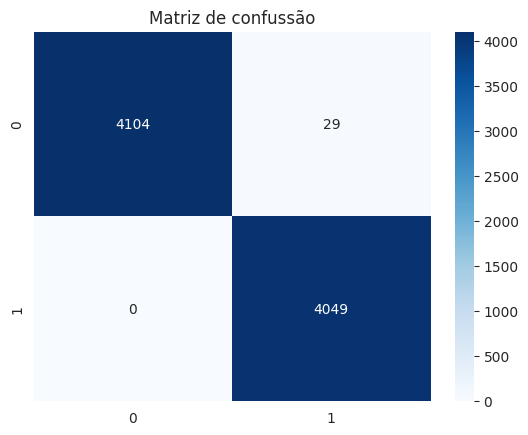

In [64]:
# Fazendo a matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_test, predictions)

# Plotando a matriz de confusão
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de confussão')
print(classification_report(y_test, predictions))

In [65]:
# Fazendo o recall do modelo
from sklearn.metrics import recall_score

recall_score(y_test, predictions)

1.0

O Recall também apresentou um excelente resultado, o que é mais importante que a acurácia em sí, visto que nosso problema tem um prejuízo maior quanto se trata de falsos negativos.

Estou bastante satisfeito com os resultados obtidos pelo modelo. Talvez possa melhorar a performance dele para rodar o mesmo mais rápido, visto que algumas linhas de códigos não se mostraram necessárias na prática, apenas como observação e aprendizado.



## Quais são as principais features para o algoritmo?

É interessante encontrar as features que tem melhor correlação com o nosso target, que no caso é a ocorrência de AVC. Essa informação pode ser bem útil para o profissional da saúde que gostaria de estudar e indicar o melhor tratamento para o paciente, além de ser um bom guia para a prevenção da doença.

In [66]:
# Importância de Atributos com ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(feature,target)

# Exibe os atributos orginais
print("\nAtributos Originais:", avc.columns[0:10])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
[0.01033481 0.03408235 0.06597896 0.04560718 0.03821629 0.07244224
 0.04108295 0.36303513 0.29716044 0.03205966]


As 5 colunas com o score mais altos são:
- 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi'.

In [67]:
# Criação do modelo
modelo = DecisionTreeClassifier()

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=5)
fit = rfe.fit(feature, target)

# Print dos resultados
print("Atributos Originais:", avc.columns[0:10])

# Exibe os atributos selecionados
print("\nNomes dos Atributos Selecionados usando DecisionTreeClassifier: %s" % fit.get_feature_names_out(input_features=avc.columns[0:10]))

# Criação do modelo com Regressão Logística
modelo = LogisticRegression()

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=5)
fit = rfe.fit(feature, target)
print("\nNomes dos Atributos Selecionados usando LogisticRegression: %s" % fit.get_feature_names_out(input_features=avc.columns[0:10]))

Atributos Originais: Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

Nomes dos Atributos Selecionados usando DecisionTreeClassifier: ['hypertension' 'ever_married' 'work_type' 'avg_glucose_level' 'bmi']

Nomes dos Atributos Selecionados usando LogisticRegression: ['sex' 'hypertension' 'heart_disease' 'ever_married' 'smoking_status']


Feito a eliminação recursiva de atributos, o modelo me trouxe um resultado diferente da seleção univariada, as 5 melhores variáveis foram:
- 'hypertension' 'ever_married' 'work_type' 'avg_glucose_level', 'bmi'
- 'avc_glucose_level' tem uma **execelente correlação** utilizando modelos baseados em árvore de decisão. Ao fazer a eliminação recursiva de atributos com o modelo de Regressão Logística essa categoria não aparece entre as 5 melhores.

Identifiquei um fator chave que contribui para o desempenho excepcional dos modelos de árvore de decisão em nosso conjunto de dados. A variável 'avg_glucose_level' demonstra uma forte correlação com esse tipo de modelo. Com base nisso, podemos considerar o nível de glicose no sangue como um indicador significativo da probabilidade de ocorrência de AVC em um indivíduo.

Além disso, várias outras informações revelaram-se relevantes para orientar profissionais de saúde sobre os cuidados necessários na detecção de AVC. Fatores como hipertensão, histórico de doenças cardíacas e índice de massa corporal do paciente demonstraram ter uma influência substancial nos resultados de nosso conjunto de dados. Esses insights são cruciais para garantir uma abordagem cuidadosa ao lidar com essa condição médica.

Nossas análises revelaram resultados notáveis em termos de acurácia e recall, este último sendo de especial importância. Após uma minuciosa análise de nosso conjunto de dados e o devido tratamento dos dados, conduzimos testes com diversos modelos, incluindo a padronização e normalização dos dados para comparação. Destacamos uma relação particularmente forte entre nossos dados e modelos baseados em árvore de decisão, especialmente quando otimizados com a hiperparametrização do modelo para alcançar os melhores resultados.